In [56]:
import pandas as pd
pd.options.display.max_columns = 500

df = pd.read_csv("Samara_flat_data12.csv", index_col=0)

In [57]:
df = df.drop(['id', 'latitude', 'longitude'], axis=1)

print(df.shape)

df.head()

(5678, 33)


,Цена,Цена за кв.метр,Количество собственников,Район,Улица,Вид сделки,Количество комнат,Общая площадь,Площадь кухни,Жилая площадь,Этаж,Этажей в доме,Балкон или лоджия,Высота потолков,Санузел,Окна,Ремонт,Техника,Способ продажи,Тип дома,Год постройки,Пассажирский лифт,Грузовой лифт,В доме,Двор,Парковка,Дополнительно,Тип комнат,Мебель,Тип продавца,Data_added,center_distance,metro_distance
0,9350000.0,110000.0,1 собственник,Kirovsky,"18-й километр, 37",возможна ипотека,3,85.0,17.5,NaN,25.0,25.0,балкон,NaN,раздельный,NaN,дизайнерский,NaN,свободная,монолитный,2021.0,1,2,NaN,"детская площадка, спортивная площадка",открытая во дворе,панорамные окна,изолированные,"кухня, хранение одежды, спальные места",агентство,2025-05-27,NaN,NaN
1,8200000.0,197590.0,1 собственник,Oktyabrsky,"Московское ш., 29",NaN,студия,41.5,NaN,41.5,17.0,24.0,балкон,2.7,совмещенный,"во двор, на солнечную сторону",дизайнерский,"кондиционер, холодильник, стиральная машина",свободная,монолитный,NaN,3,3,NaN,"детская площадка, спортивная площадка",подземная,гардеробная,NaN,"кухня, хранение одежды, спальные места",частное лицо,2025-05-27,7.14,2.04
4,11200000.0,129032.0,2 собственника или больше,Zheleznodorozhny,"Революционная ул., 146А",NaN,3,86.8,12.1,47.5,1.0,11.0,лоджия,2.7,раздельный,"во двор, на солнечную сторону",евро,NaN,свободная,кирпичный,2000.0,1,1,газ,"детская площадка, спортивная площадка","подземная, открытая во дворе",NaN,изолированные,"кухня, хранение одежды",частное лицо,2025-05-27,5.80,0.64
5,7400000.0,208451.0,1 собственник,Oktyabrsky,"ул. Осипенко, 2Б",возможна ипотека,1,35.5,7.6,18.8,1.0,16.0,лоджия,2.7,совмещенный,во двор,косметический,"холодильник, стиральная машина",свободная,кирпичный,1977.0,1,1,"мусоропровод, газ","детская площадка, спортивная площадка",открытая во дворе,NaN,NaN,"кухня, хранение одежды, спальные места",агентство,2025-05-27,3.59,0.58
6,4999000.0,89428.0,2 собственника или больше,Promyshlenny,"Воронежская ул., 188",NaN,3,55.9,6.0,35.0,1.0,5.0,NaN,NaN,раздельный,NaN,косметический,NaN,свободная,кирпичный,NaN,нет,нет,NaN,NaN,NaN,NaN,изолированные,"кухня, хранение одежды, спальные места",агентство,2025-05-27,10.06,3.35


In [58]:
 df = df.rename(
            columns={
                "URL": "url",
                "Цена": "price",
                "Цена за кв.метр": "price_per_sqm",
                "Количество собственников": "number_of_owners",
                "Район": "district",
                "Улица": "street",
                "Вид сделки": "deal_type",
                "Количество комнат": "number_of_rooms",
                "Общая площадь": "total_area",
                "Площадь кухни": "kitchen_area",
                "Жилая площадь": "living_area",
                "Этаж": "floor",
                "Этажей в доме": "floors_in_building",
                "Балкон или лоджия": "balcony_or_loggia",
                "Высота потолков": "ceiling_height",
                "Санузел": "bathroom",
                "Окна": "windows",
                "Ремонт": "renovation",
                "Техника": "appliances",
                "Способ продажи": "sale_method",
                "Тип дома": "building_type",
                "Год постройки": "year_built",
                "Пассажирский лифт": "passenger_elevator",
                "Грузовой лифт": "freight_elevator",
                "В доме": "in_building",
                "Двор": "courtyard",
                "Парковка": "parking",
                "Дополнительно": "additional_info",
                "Тип комнат": "room_type",
                "Мебель": "furniture",
                "Тип продавца": "seller_type",
                "Data_added": "data_added",
            }
        )

In [59]:
 def normalize_ceiling_height(df):
    """
    Преобразует значения в столбце 'ceiling_height' так, чтобы первая цифра числа
    стала целой частью, а все остальные - дробной частью.
    Например: 2700.0 -> 2.7, 280.0 -> 2.8, 28.0 -> 2.8
    """
    def _convert_value(x):
        if x == 0:
            return 0.0
        try:
            # Преобразуем число в строку и удаляем точку (если это float)
            s = str(x).replace('.', '')
            # Первая цифра - целая часть, остальные - дробная
            if len(s) > 1:
                return float(f"{s[0]}.{s[1:]}")
            else:
                return float(s[0])
        except:
            return x
    
    df['ceiling_height'] = df['ceiling_height'].apply(_convert_value)
    return df

In [60]:
df['number_of_owners'].unique().tolist()

['1 собственник',
 '2 собственника или больше',
 'Группа компаний «Новый ДОН»',
 'Группа компаний «Строительный холдинг Град»',
 'Контактное лицо',
 'Авито — сайт объявлений России. © ООО «КЕХ еКоммерц» 2007–2025. Правила Авито. Политика конфиденциальности. Оплачивая услуги на Авито, вы принимаете оферту. Авито использует рекомендательные технологии.',
 'Группа компаний «Владимир»',
 'ООО «СЗ «СПЕКТРСТРОЙ»',
 'Группа компаний «УК Альянс-Менеджмент»',
 'Группа компаний «Финстрой»',
 'Группа компаний «ВИРА»',
 'Группа компаний «Древо»',
 'Группа компаний «СтройКонтракт»',
 'Группа компаний «Корпорация КОШЕЛЕВ»',
 'Группа компаний «Развитие»',
 'ООО «СЗ «Архитектор»',
 'ООО «СЗ ПАРКОВЫЙ»',
 'ООО «Специализированный Застройщик «ГВ Девелопмент»',
 'ООО СЗ «ВОЛГА СТРОЙ ДЕВЕЛОПМЕНТ»',
 'Группа компаний «Амонд»',
 'ООО «Специализированный Застройщик «Ракита»',
 'Закажите бесплатный звонок',
 'Группа компаний «Новое Время»',
 'ООО «КОЛЬЦО»',
 'Группа компаний «Самарский хлебзавод №9»',
 'ООО «\

In [61]:
# Функция для категоризацииdef categorize_owner(owner_str):
def categorize_owner(owner_str):
    owner_str = str(owner_str).lower()  # Приводим к нижнему регистру
    
    # Правило 1: Собственники
    if '1 собственник' in owner_str:
        return '1 собственник'
    elif '2 собственника' in owner_str or 'собственников' in owner_str:
        return '2 собственника или больше'
    
    # Правило 2: Застройщики (ООО, ГК, СЗ и т.д.)
    keywords = ['группа компаний', 'ооо', 'сз', 'застройщик', 'трест', 'фирма']
    if any(keyword in owner_str for keyword in keywords):
        return 'застройщик'
    
    # Правило 3: По умолчанию (если не подошло)
    return 'застройщик'

# Применяем функцию
df['number_of_owners'] = df['number_of_owners'].apply(categorize_owner)

In [62]:
df['number_of_owners'].unique()

array(['1 собственник', '2 собственника или больше', 'застройщик'],
      dtype=object)

In [63]:
import numpy as np

numeric_columns = df.loc[:,df.dtypes!=np.object_].columns

df.describe()

,price,price_per_sqm,total_area,kitchen_area,living_area,floor,floors_in_building,ceiling_height,year_built,center_distance,metro_distance
count,5.677000e+03,5.678000e+03,5678.000000,5268.000000,4596.000000,5678.000000,5678.000000,3238.000000,3370.000000,5229.000000,5229.000000
mean,7.292827e+06,1.273229e+05,55.408383,11.487415,30.208964,6.196372,11.355935,11.102100,1987.735608,12.601895,7.730306
std,5.719497e+06,4.573410e+04,34.461659,7.457490,15.568571,5.001885,6.995805,123.664678,97.814235,110.607532,110.381490
min,8.000000e+05,5.600000e+03,12.500000,2.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.060000,0.050000
25%,4.150000e+06,9.932675e+04,38.500000,7.000000,18.000000,2.000000,5.000000,2.500000,1972.000000,5.470000,1.210000
50%,5.799999e+06,1.180760e+05,49.000000,9.600000,28.750000,5.000000,9.000000,2.700000,1992.000000,8.260000,2.730000
75%,8.400000e+06,1.454275e+05,65.000000,13.300000,38.800000,8.000000,16.000000,2.700000,2015.000000,11.670000,5.830000
max,8.800000e+07,1.110886e+06,1327.000000,84.000000,240.000000,30.000000,37.000000,2900.000000,2025.000000,5470.830000,5458.680000


In [64]:
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

In [65]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
center_distance     metro_distance        0.999364
price               price_per_sqm         0.686666
floor               floors_in_building    0.657174
total_area          living_area           0.633013
price               total_area            0.623759
                    kitchen_area          0.621488
                    living_area           0.544879
total_area          kitchen_area          0.469828
price_per_sqm       floors_in_building    0.459408
                    kitchen_area          0.392950
kitchen_area        floors_in_building    0.375549
price               floors_in_building    0.333945
price_per_sqm       floor                 0.317312
kitchen_area        floor                 0.235172
price               floor                 0.233592
kitchen_area        living_area           0.233000
price_per_sqm       total_area            0.151004
floors_in_building  year_built            0.139302
total_area          ceiling_height        0.137620
     

In [66]:
### Сворованный со stackoverflow код
### Удалим колонки, где корреляция оказывается > 0.9

def correlation(dataset, threshold):
    # Оставляем только вещественные колонки
    float_columns = dataset.select_dtypes(include=['float64']).columns
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset[float_columns].corr()  # Вычисляем корреляцию только для вещественных колонок
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]  # deleting the column from the dataset

correlation(df, 0.8)

In [67]:
numeric_columns = df.loc[:,df.dtypes!=np.object_].columns

df.shape

(5678, 32)

In [68]:
numeric_columns = df.loc[:,df.dtypes!=np.object_].columns

df.shape

(5678, 32)

In [69]:
from sklearn.feature_selection import VarianceThreshold


cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

constant_cols

[]

In [70]:
df = df.drop('street',axis=1)

In [71]:
categorical_columns = df.loc[:,df.dtypes==np.object_].columns

df.describe(include='object')

,number_of_owners,district,deal_type,number_of_rooms,balcony_or_loggia,bathroom,windows,renovation,appliances,sale_method,building_type,passenger_elevator,freight_elevator,in_building,courtyard,parking,additional_info,room_type,furniture,seller_type,data_added
count,5678,4950,3603,5678,4134,4981,4123,4740,2216,5167,5674,4241,3779,2530,4048,4031,979,3241,2722,5678,5678
unique,3,11,4,10,3,3,7,4,31,4,6,5,5,7,7,15,3,3,7,2,8
top,застройщик,Kirovsky,возможна ипотека,1,лоджия,совмещенный,во двор,косметический,кондиционер,свободная,кирпичный,1,нет,газ,"детская площадка, спортивная площадка",открытая во дворе,гардеробная,изолированные,"кухня, хранение одежды, спальные места",агентство,2025-05-27
freq,2604,950,3582,2004,2256,3072,1487,2119,488,4492,2973,2391,2113,1791,1909,3111,636,2627,1367,3663,1558


In [72]:
df['district'].unique()

array(['Kirovsky', 'Oktyabrsky', 'Zheleznodorozhny', 'Promyshlenny',
       'Samarsky', 'Krasnoglinsky', nan, 'Sovetsky', 'Kuibyshevsky',
       'Leninsky', 'посёлок Металлистов', 'Южный Посёлок'], dtype=object)

In [73]:
df = df[~df['district'].isin(['посёлок Металлистов', 'Южный Посёлок'])]

In [74]:
### Преобразуем категориальные колонки

for col in categorical_columns:
    if col != 'data_added': 
        if df[col].nunique() < 5:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

        else:
            mean_target = df.groupby(col)['price'].mean()
            df[col] = df[col].map(mean_target)

In [75]:
df.head()

,price,price_per_sqm,district,number_of_rooms,total_area,kitchen_area,living_area,floor,floors_in_building,ceiling_height,windows,appliances,building_type,year_built,passenger_elevator,freight_elevator,in_building,courtyard,parking,furniture,data_added,center_distance,number_of_owners_2 собственника или больше,number_of_owners_застройщик,deal_type_возможна ипотека,"deal_type_возможна ипотека, аукцион",deal_type_продажа доли,"balcony_or_loggia_балкон, лоджия",balcony_or_loggia_лоджия,bathroom_совмещенный,"bathroom_совмещенный, раздельный",renovation_евро,renovation_косметический,renovation_требует ремонта,sale_method_договор долевого участия,sale_method_переуступка,sale_method_свободная,"additional_info_гардеробная, панорамные окна",additional_info_панорамные окна,"room_type_изолированные, смежные",room_type_смежные,seller_type_частное лицо
0,9350000.0,110000.0,5.278056e+06,1.036866e+07,85.0,17.5,28.75,25.0,25.0,2.7,NaN,NaN,1.072561e+07,2021.0,7.900561e+06,9.919735e+06,NaN,6.035272e+06,5.694678e+06,7.939965e+06,2025-05-27,8.26,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
1,8200000.0,197590.0,1.021661e+07,4.315725e+06,41.5,9.6,41.50,17.0,24.0,2.7,6.619315e+06,6.496400e+06,1.072561e+07,1992.0,1.435544e+07,9.884295e+06,NaN,6.035272e+06,1.763979e+07,7.939965e+06,2025-05-27,7.14,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
4,11200000.0,129032.0,6.791338e+06,1.036866e+07,86.8,12.1,47.50,1.0,11.0,2.7,6.619315e+06,NaN,6.701994e+06,2000.0,7.900561e+06,9.655829e+06,5.475785e+06,6.035272e+06,1.052014e+07,6.782274e+06,2025-05-27,5.80,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True
5,7400000.0,208451.0,1.021661e+07,4.892701e+06,35.5,7.6,18.80,1.0,16.0,2.7,5.652308e+06,5.165490e+06,6.701994e+06,1977.0,7.900561e+06,9.655829e+06,5.827720e+06,6.035272e+06,5.694678e+06,7.939965e+06,2025-05-27,3.59,False,False,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False
6,4999000.0,89428.0,6.558248e+06,1.036866e+07,55.9,6.0,35.00,1.0,5.0,2.7,NaN,NaN,6.701994e+06,1992.0,4.801259e+06,5.406284e+06,NaN,NaN,NaN,7.939965e+06,2025-05-27,10.06,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


In [76]:
df['data_added'] = pd.to_datetime(df['data_added'])

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

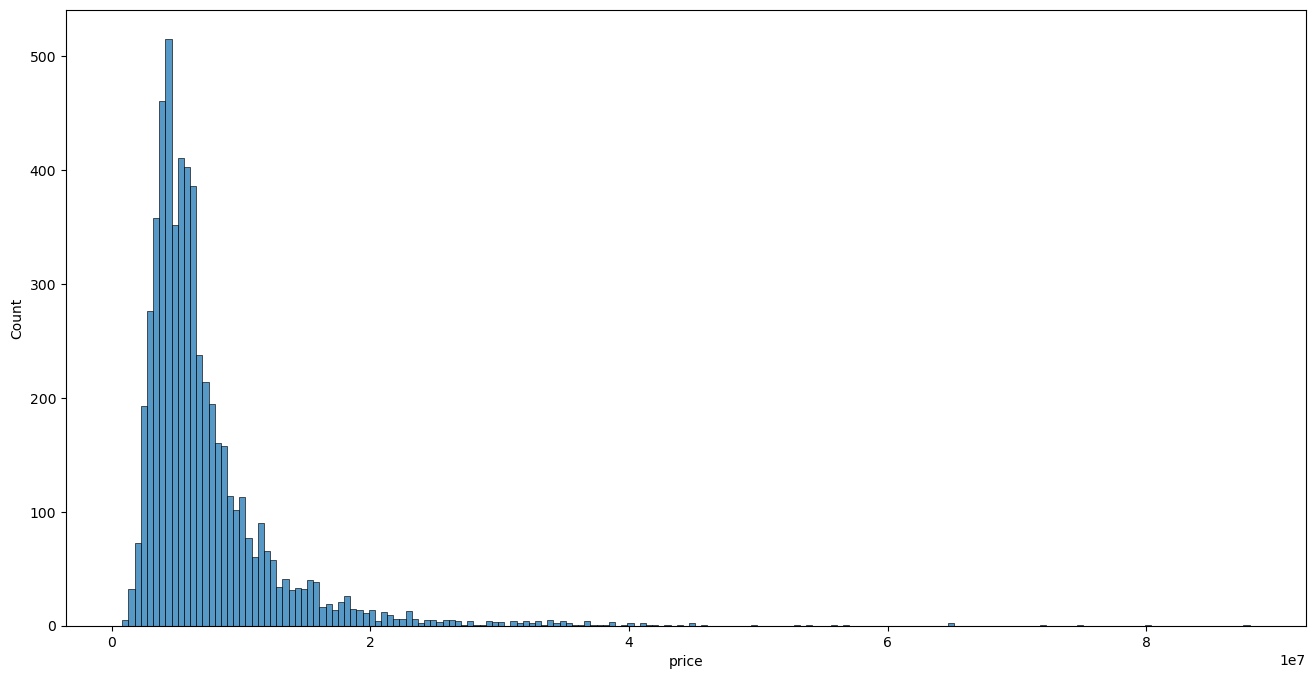

In [78]:
plt.figure(figsize=(16,8))
sns.histplot(df['price'])
plt.show()

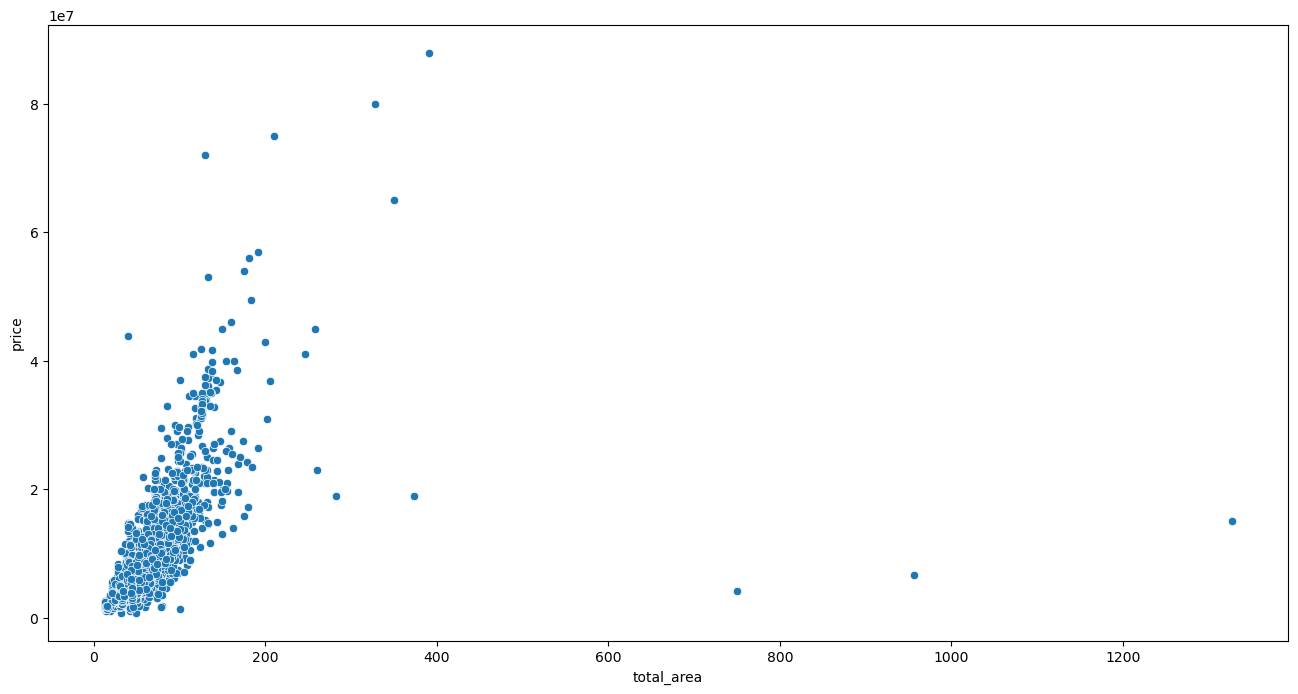

In [79]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='total_area', y='price')
plt.show()

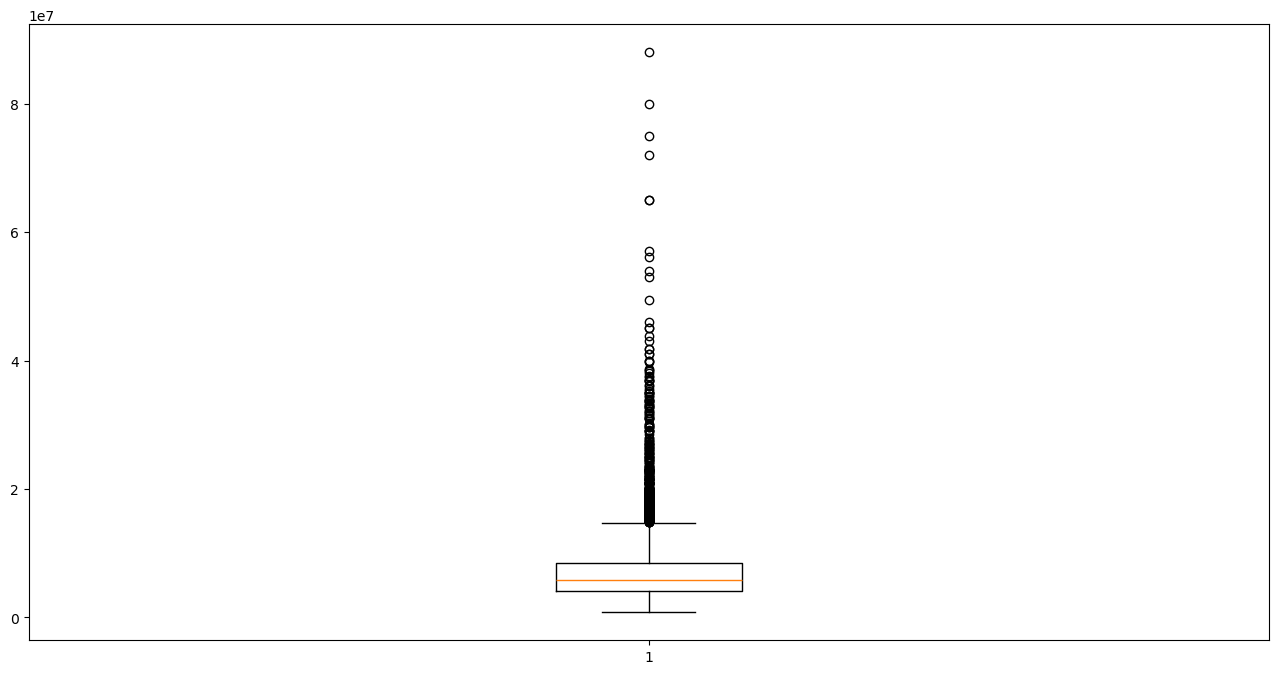

In [80]:
plt.figure(figsize=(16,8))
plt.boxplot(df['price'])
plt.show()

In [81]:
df.isnull().sum()

price                                              0
price_per_sqm                                      0
district                                         728
number_of_rooms                                    0
total_area                                         0
kitchen_area                                       0
living_area                                        0
floor                                              0
floors_in_building                                 0
ceiling_height                                     0
windows                                         1555
appliances                                      3461
building_type                                      4
year_built                                         0
passenger_elevator                              1435
freight_elevator                                1897
in_building                                     3148
courtyard                                       1629
parking                                       

In [82]:
for column in ['appliances', 'district', 'windows', 'passenger_elevator', 
               'freight_elevator', 'in_building', 'courtyard', 'parking', 
               'furniture', 'building_type']:
    if column in df.columns:
        # Заполняем пропуски модой, если колонка существует
        df[column] = df[column].fillna(df[column].mode()[0])

# Проверка на наличие пропусков
print(df.isnull().sum())

price                                           0
price_per_sqm                                   0
district                                        0
number_of_rooms                                 0
total_area                                      0
kitchen_area                                    0
living_area                                     0
floor                                           0
floors_in_building                              0
ceiling_height                                  0
windows                                         0
appliances                                      0
building_type                                   0
year_built                                      0
passenger_elevator                              0
freight_elevator                                0
in_building                                     0
courtyard                                       0
parking                                         0
furniture                                       0


__Построение__ __Модели__

In [83]:
X = df.drop(['data_added','price'],axis=1)
y = df['price']

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

splitter = KFold(n_splits=4, shuffle=True, random_state=42)

model = LinearRegression()

cv_result = cross_validate(model, X, y, 
                           scoring='neg_mean_squared_error',
                           cv=splitter, return_train_score=True)

cv_result

{'fit_time': array([0.01117873, 0.00720716, 0.0058105 , 0.00634837]),
 'score_time': array([0.00278306, 0.00270247, 0.00228262, 0.0022037 ]),
 'test_score': array([-3.48077817e+12, -3.63924970e+12, -7.08483734e+12, -5.00024825e+12]),
 'train_score': array([-4.52538006e+12, -4.45734908e+12, -3.41014946e+12, -4.15992697e+12])}

In [85]:
print(f"Среднее RMSE на тренировочных фолдах: {(-np.mean(cv_result['train_score']))**0.5}")
print(f"Среднее RMSE на тестовых фолдах: {(-np.mean(cv_result['test_score']))**0.5}")

Среднее RMSE на тренировочных фолдах: 2034256.9631505625
Среднее RMSE на тестовых фолдах: 2191181.955767903


__Теперь__ __попробую__ __Лассо__

In [86]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(max_iter=100000)

cv_result_lasso = cross_validate(model_lasso, X, y, 
                                 scoring='neg_mean_squared_error',
                                 cv=splitter, return_train_score=True)

cv_result_lasso

{'fit_time': array([0.04036164, 0.02666736, 0.02529001, 0.02513075]),
 'score_time': array([0.00279713, 0.00225902, 0.00243115, 0.00220656]),
 'test_score': array([-3.48077677e+12, -3.63924325e+12, -7.08482012e+12, -5.00020642e+12]),
 'train_score': array([-4.52538006e+12, -4.45734908e+12, -3.41014947e+12, -4.15992697e+12])}

In [87]:
print(f"Среднее RMSE на тренировочных фолдах: {((-np.mean(cv_result_lasso['train_score']))**0.5).round(3)}")
print(f"Среднее RMSE на тестовых фолдах: {((-np.mean(cv_result_lasso['test_score']))**0.5).round(3)}")

Среднее RMSE на тренировочных фолдах: 2034256.964
Среднее RMSE на тестовых фолдах: 2191178.14


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))])
pipe.fit(X, y)

print(pipe.predict(X.head(1)))

cv_result_pipe = cross_validate(pipe, X, y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

[9229630.56519747]


In [89]:
print(f"Среднее RMSE на тренировочных фолдах: {((-np.mean(cv_result_pipe['train_score']))**0.5).round(3)}")
print(f"Среднее RMSE на тестовых фолдах: {((-np.mean(cv_result_pipe['test_score']))**0.5).round(3)}")

Среднее RMSE на тренировочных фолдах: 2034256.963
Среднее RMSE на тестовых фолдах: 2191181.417


In [90]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Lasso': Lasso(max_iter=100000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Lasso__alpha': 1.0,
 'Lasso__copy_X': True,
 'Lasso__fit_intercept': True,
 'Lasso__max_iter': 100000,
 'Lasso__positive': False,
 'Lasso__precompute': False,
 'Lasso__random_state': None,
 'Lasso__selection': 'cyclic',
 'Lasso__tol': 0.0001,
 'Lasso__warm_start': False}

In [91]:
alphas = np.linspace(start=0.01, stop=1, num=30)
alphas

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-4801276002617.58594):
{'Lasso__alpha': 1.0}


__Метод__ __Обёртки__

In [93]:
y_log =  np.log(df['price'])

In [94]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(pipe, n_features_to_select=20)
sfs.fit(X, y_log)

SequentialFeatureSelector(estimator=Pipeline(steps=[('scaler',
                                                     StandardScaler()),
                                                    ('Lasso',
                                                     Lasso(max_iter=100000))]),
                          n_features_to_select=20)

In [95]:
selected_features = X.columns[sfs.get_support()]
print("Выбранные фичи:", selected_features.tolist())

Выбранные фичи: ['price_per_sqm', 'district', 'number_of_rooms', 'total_area', 'kitchen_area', 'living_area', 'floor', 'floors_in_building', 'ceiling_height', 'windows', 'appliances', 'building_type', 'year_built', 'passenger_elevator', 'freight_elevator', 'in_building', 'courtyard', 'parking', 'furniture', 'center_distance']


In [96]:
X_selected = df[selected_features]

In [97]:
pipe = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))])
pipe.fit(X_selected, y_log)

print(pipe.predict(X_selected.head(1)))

cv_result_pipe = cross_validate(pipe, X_selected, y_log, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

[15.62079844]


In [98]:
print(f"Среднее RMSE на тренировочных фолдах: {((-np.mean(cv_result_pipe['train_score']))**0.5).round(3)}")
print(f"Среднее RMSE на тестовых фолдах: {((-np.mean(cv_result_pipe['test_score']))**0.5).round(3)}")

Среднее RMSE на тренировочных фолдах: 0.564
Среднее RMSE на тестовых фолдах: 0.564


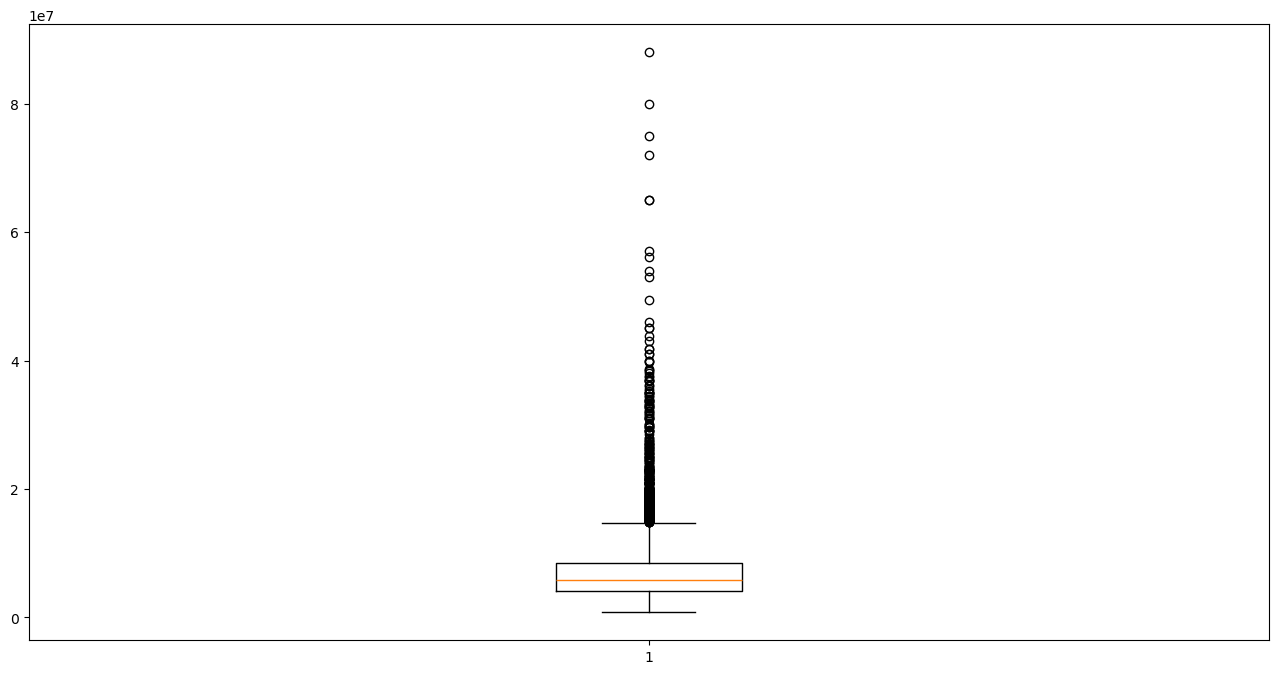

In [99]:
plt.figure(figsize=(16,8))
plt.boxplot(y)
plt.show()

In [100]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_log = cross_val_predict(pipe, X, y_log, cv=splitter)

y_pred = np.exp(y_pred_log)

rmse = np.sqrt(mean_squared_error(df['price'], y_pred))
mae = mean_absolute_error(df['price'], y_pred)

print(f"RMSE на оригинальных значениях: {rmse.round(3)}")
print(f"MAE на оригинальных значениях: {mae.round(3)}")

RMSE на оригинальных значениях: 5846374.637
MAE на оригинальных значениях: 3217459.965


In [126]:
r = df['price'].quantile(0.75) - df['price'].quantile(0.25) 
upper_quantile = df['price'].quantile(0.75)+1.5 * r
df[df['price']>upper_quantile].shape

(418, 42)

In [121]:
df_new = df[(df['price']<upper_quantile)]

X_new, Y_new = df_new[selected_features], df_new['price']

In [122]:

new_splitter = KFold(n_splits=4, shuffle=True, random_state=42)

param_grid = {
    "Lasso__alpha": alphas
}

search = GridSearchCV(pipe, param_grid, 
                      cv=new_splitter, scoring='neg_mean_squared_error')

search.fit(X_new, Y_new)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-1310911209793.13794):
{'Lasso__alpha': 1.0}


In [123]:
pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(max_iter=100000))])

In [124]:
cv_result_pipe = cross_validate(pipe, X_new, Y_new, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее RMSE на тренировочных фолдах: {np.sqrt(-np.mean(cv_result_pipe['train_score'])).round(3)}")
print(f"Среднее RMSE на тестовых фолдах: {np.sqrt(-np.mean(cv_result_pipe['test_score'])).round(3)}")

Среднее RMSE на тренировочных фолдах: 1010135.081
Среднее RMSE на тестовых фолдах: 1144950.309
